# Assignment 1.4: Polynomial Model

* *Version 1.4: Added division by `n_samples` in gradient expression. Also inserted the transpose back in to the math expression just before the def polynomial_model line.*
* *Version 1.3: Changed 'linear model' to 'polynomial model' when referring to what to plot.*
* *Version 1.2: The mathematical expression just before `polynomial_gradient(X, T, W):` incorrectly had the transpose of the matrix of powers of X.  The transpose has been removed from this most recent version.*
* *Version 1.1: Added all details, including grading script.  Also removed the sentence the steps for defining and plotting X and T for the air quality experiments being different from lecture.  It is not different from what was done in lecture.*

# Abhishek Balasubramaniam

In this first assignment, you will write and apply python code that performs gradient descent to fit a polynomial model to the air quality data discussed in the lecture during the first week.  

Write code to implement a polynomial that returns the result

$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

Name this function `polynomial_model` that is called with two arguments, a column matrix of input values with number of rows equal to the number of samples, and a column matrix of weights with the number of rows equal to the number of powers $p$ to use. Notice that the first term on the right-hand side is actually $w_0 x^0$.

* `polynomial_model(X, W)`:
    * Given
        * `X`, an n_samples x 1 numpy array of input samples
        * `W`, an n_powers x 1 numpy array of weight values
    * Return
        * an n_samples x 1 numpy array of the model's predicted outputs for each sample in `X`.

In [53]:
import numpy as np


***Polynomial Model Declaration*** 

    

In [54]:
def polynomial_model(X, W):
    power= range(0,W.size) #getting the degree of the polynomial.
    Res=X**power  # creating the polynomial matrix 
    return np.matmul(Res,W) # returns the result of the polynomial

Now implement the gradient of the mean-squared-error between the target values in `T` and the model's output, with respect to the weights, `W`.

$$ \begin{align*}
\nabla_W E
&= \nabla_Y E \; \nabla_W Y\\
&= -2 (T - Y) \; \nabla_W Y\\
&= -2 (T - Y) \; [1,\; x,\; x^2,\; x^3,\; \ldots,\; x^{p-1}]
\end{align*}$$

for one sample $x$.  With $X$ being a matrix of multiples samples, one per row, we must modify the equation to this. Notice the transpose of the matrix of powers of $X$.  <font color=red>The following expression is now divided by `n_samples`.</font>

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$
\;
* `polynomial_gradient(X, T, W)`:
   * Given
       * `X`, an n_samples x 1 numpy array of input samples
       * `T`, an n_samples x 1 numpy array of correct outputs (targets) for each input sample
       * `W`, an n_powers x 1 numpy array of weight values
    * Return
       * an n_powers x 1 numpy array of the gradient of the mean squared error with respect to each weight. (Same shape is W.)

***Polynomial Gradient Declaration*** 

In [55]:
def polynomial_gradient(X, T, W):
    power= range(0,W.size)    #getting the degree of the polynomial. 
    Res=X**power   # creating the polynomial matrix 
    Y = polynomial_model(X,W) # output of the model.
    diff = T-Y # difference between the actual value and the output of the polynomial. 
    samples = len(X) #number of samples.
    return (Res.transpose() @ (-2*diff))/samples #returns the gradient 


Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

## Simple Test of your Code

Let's copy and paste two of the functions used in lecture for use here.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [57]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence


def rmse(model, X, T, W):
    return np.sqrt(np.mean(  (T - model(X, W)) **2 )  )

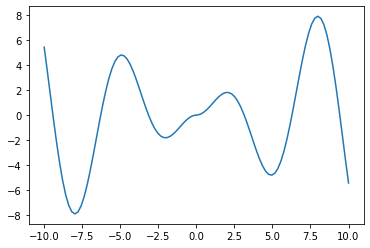

In [58]:
X = np.linspace(-10, 10, 100).reshape(-1, 1)
T = np.sin(X) * np.abs(X)
plt.plot(X, T);

In [59]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

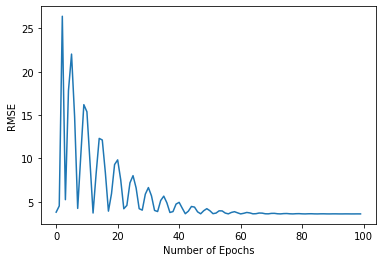

In [60]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

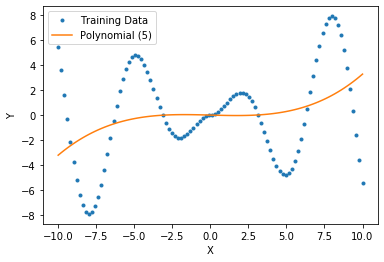

In [61]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Air Quality Data

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells.  When done correctly, `X` and `T` should both have shape `(827, 1)`.  Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

Now apply the Adam optimization function to fit a polynomial to this data.  Try several different values of `n_powers` and `n_steps`.  Plot the results and describe what you see.

# Import libraries

In [62]:
import numpy as np
import pandas

import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rc('animation', html='jshtml')
plt.rc('animation', embed_limit = 1e9)

**Download the data and unzip**

In [63]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0  1538k      0 --:--:-- --:--:-- --:--:-- 1537k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


**Print the first 10 values from the dataset**

In [64]:
!head AirQualityUCI.csv

**Convert the dataset to pandas dataframe**

In [65]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
data.shape

(827, 15)

X.shape = (827, 1) Xnames = ['Hour']
T.shape = (827, 1) Tnames = ['CO']


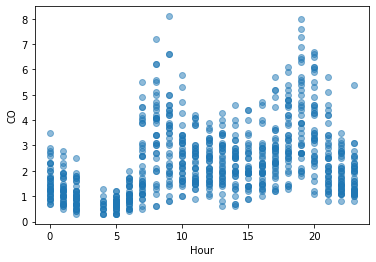

In [66]:
hour = [int(t[:2]) for t in data['Time']]
CO = data['CO(GT)']
T = CO
T = np.array(T).reshape((-1, 1))  # make T have one column and as many rows as needed to hold the values of T
Tnames = ['CO']
X = np.array(hour).reshape((-1, 1))
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)
plt.plot(X, T, 'o', alpha=0.5)
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]);  # semi-colon here prevents printing the cryptic result of call to plt.ylabel()

Let consider ***n_power*** = **5**  and keep ***n_steps***= 100 

In [67]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

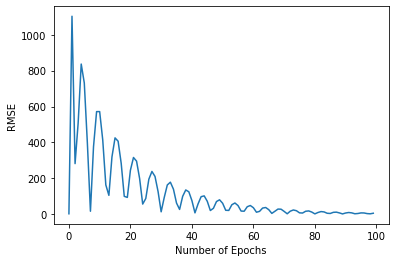

In [68]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');


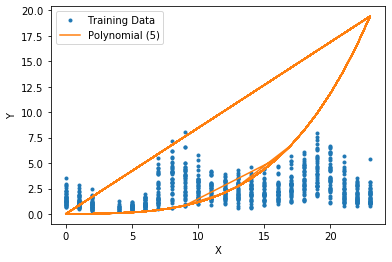

In [69]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Observation


1. The RMSE value decreases as the number of steps increases. In the start the value peaks to 1000 but at approximately 20 steps the RMSE value drops down and stabilizes to drop down. 
2. the RMSE value nears to 0 after 80 steps. 
3. In the training data and polynomial model output graph the output seems to be out of range of the training data.
4. For n_steps = 5 and N_power = 100 the model doesnot predict properly. 
5. Most of the predicted values lies outside the desired output value range. The model doesnot perform well for this configuration. To improve the model we can change the n_steps and n_power values. 
6. To get the most suitable model output lets keep n_steps constant at 100 and change n_power and then lets change n_steps while keeping n_power constant at 5. 

 lets keep n_steps constant and **n_power = 3**

In [73]:
n_powers =3
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

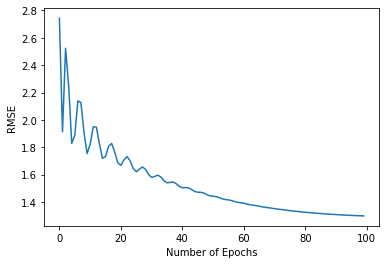

In [74]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

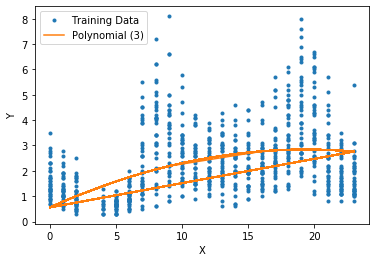

In [75]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

 lets keep n_steps constant and **n_power = 6**

In [76]:
n_powers =6
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

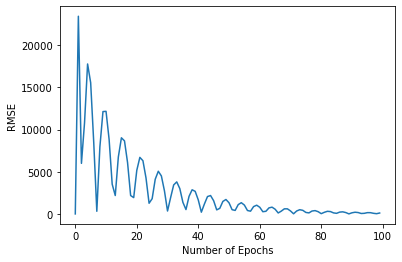

In [77]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

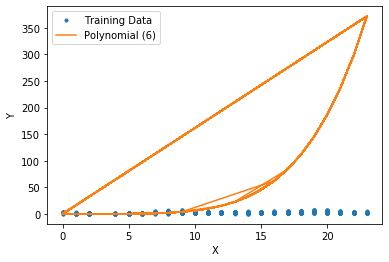

In [78]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Lets keep n_power = 5 as constant and change n_steps = 85 

In [79]:
n_powers =5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 85  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

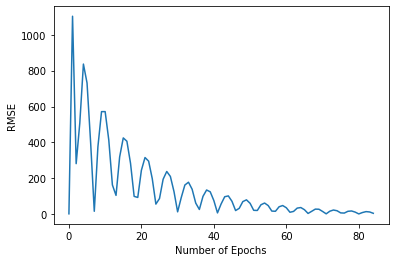

In [80]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

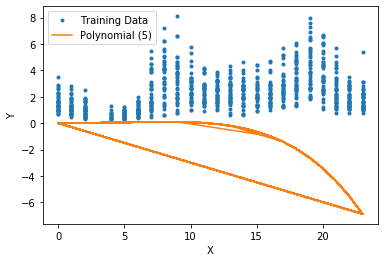

In [81]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Lets keep n_power = 5 as constant and change n_steps = 110 

In [82]:
n_powers =5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 115  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

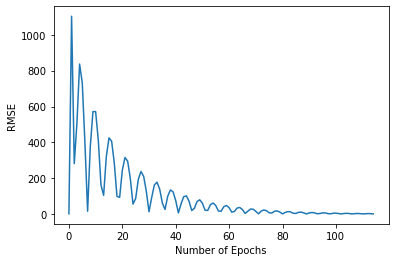

In [83]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

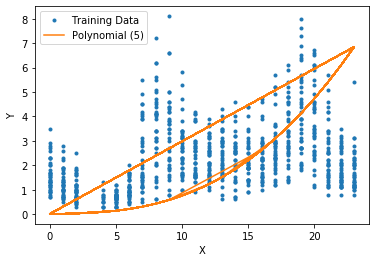

In [84]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

Lets keep n_power = 5 as constant and change n_steps = 150 

In [85]:
n_powers =5
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 125  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

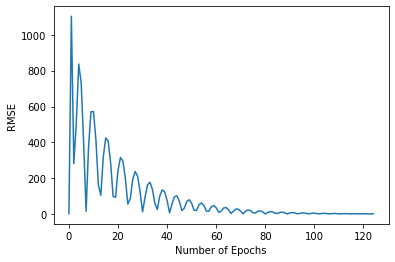

In [86]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

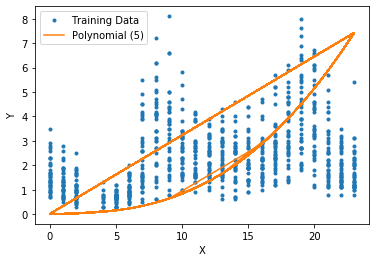

In [87]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

lets consider n_steps = 115 and n_powers = 2

In [88]:
n_powers =3
W = np.zeros((n_powers, 1))  # Initial weights
             
rho = 0.01  # learning rate
n_steps = 125  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

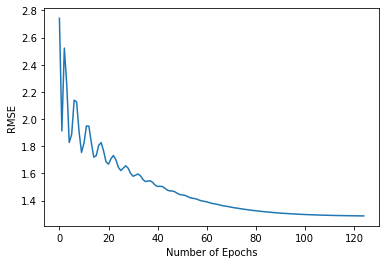

In [89]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

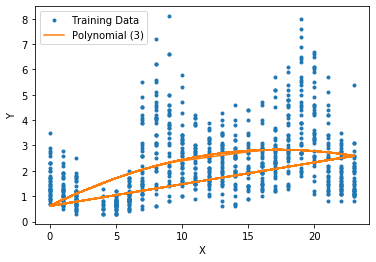

In [90]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Observation

1. While keeping the n_steps at 100 and changing the n_power values. we can observe that the model fits well when n_power decreases and doesnot perform well when n_power increases.  
2. Considering this we can conclude that n_power =5 is a threshold value and when we go beyond this range the model underfits. 
3. we can observe that n=3 gives a better output than n = 5. 
4. When n_power was kept constant and n_steps was changed we can observe that the when the the value drops below 100 the model underfits and when the value goes above 120 also the model performs poorly. 
5. when n_steps is kept at 125 the model performs better. 
6. considering both best values i created a model with n_steps = 125 and n_power =3 this model output performs really well.
7. The RSME value of the model when kept at n_power =3 and n_steps =125 does not reach near zero. It stops at 1.25 
8. Considering the above data we can say that 3rd degree polynomial with 125 as n_steps. 


# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) (to be provided soon) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [92]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Balasubramaniam-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)
    T = np.array([[   4.2],
                  [  -4.8],
                  [  40.2],
                  [ -50.8],
                  [ 156.2],
                  [-454.8],
                  [ 820.2],
                  [-908.8]])
    gradient = polynomial_gradient(X, T, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
    T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
    W = np.zeros((5, 